I'm going to use some detection models from TensorFlow to detect how many people there are on a image. I'm gonna compare different models on accuracy and on speed.

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import cv2  as cv
import time 
import numpy as np

First detection models that i going to test is "centernet/resnet50v1_fpn_512x512_kpts". On the website of Tensorflow they say that is is done in 30 ms. So that is a fast one. So let check if it's realy that quick and that it is accurate.

In [2]:
# load the model
detector1 = hub.load("https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1")

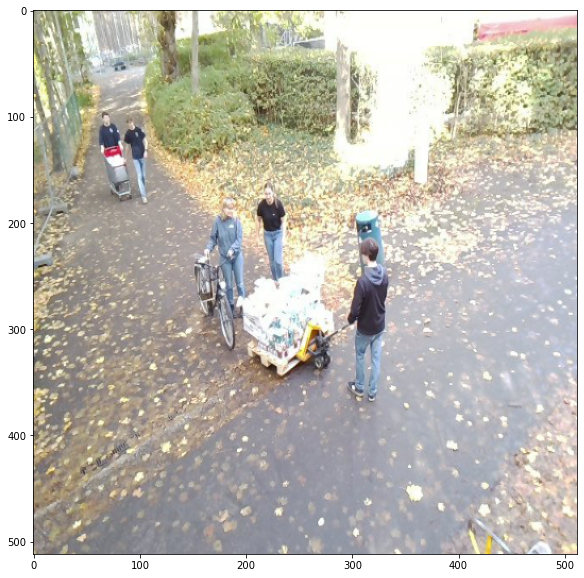

In [3]:
# load the image
test = plt.imread("1666696572939.jpg")
test = cv.resize(test, (512, 512))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)

In [4]:
# run the model
t0 = time.time()
detector_output1 = detector1(tf.expand_dims(test, axis=0))
t = time.time()
class_ids = detector_output1["detection_classes"]
detector_output1.keys()

dict_keys(['detection_boxes', 'detection_classes', 'detection_keypoint_scores', 'detection_keypoints', 'detection_scores', 'num_detections'])

In [5]:
# check the time
t - t0

3.2669217586517334

The differce in time is 0.35 seconds

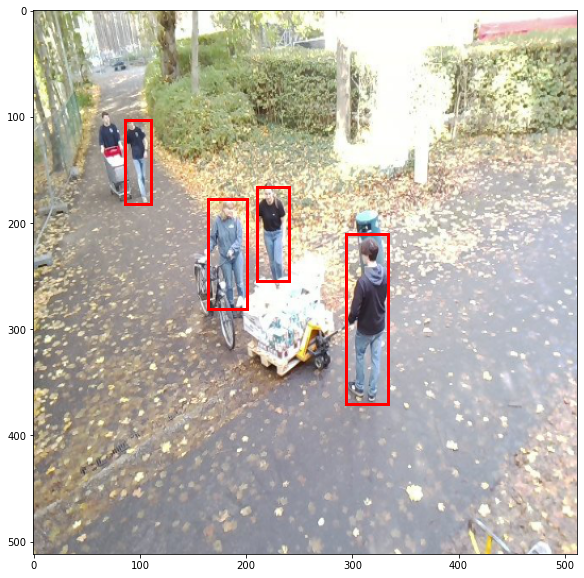

In [6]:
#show the images with the bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)
for i in range(len(detector_output1['detection_boxes'][0])):
    if detector_output1['detection_scores'][0][i] > 0.5 and detector_output1['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output1['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 512, xmax * 512, ymin * 512, ymax * 512)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)



So here we see that they only detected 4 out of 5 people, what is not bad but it can better.

Now i'm going to use the "centernet/hourglass_512x512_kpts" model.

In [7]:
# load the model
detector2 = hub.load("https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1")

In [8]:
# run the model
t0 = time.time()
detector_output2 = detector2(tf.expand_dims(test, axis=0))
t = time.time()
class_ids = detector_output2["detection_classes"]
detector_output2.keys()

dict_keys(['detection_boxes', 'detection_classes', 'detection_keypoint_scores', 'detection_keypoints', 'detection_scores', 'num_detections'])

In [9]:
t - t0

4.60173773765564

I get a 4.79 seconds difference

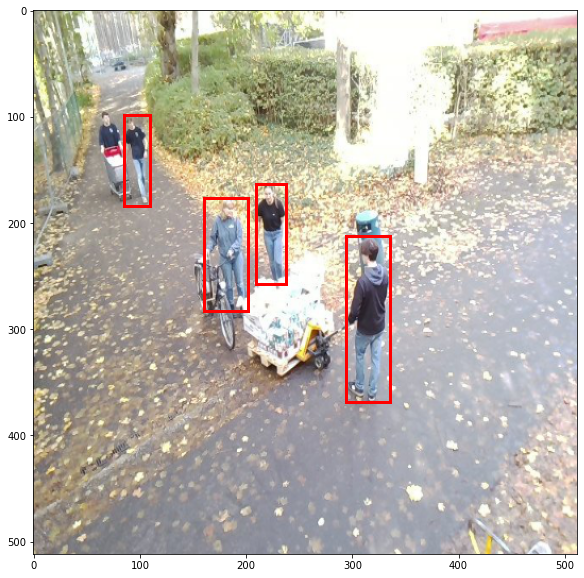

In [10]:
#show the images with the bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)
for i in range(len(detector_output2['detection_boxes'][0])):
    if detector_output2['detection_scores'][0][i] > 0.50 and detector_output2['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output2['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 512, xmax * 512, ymin * 512, ymax * 512)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)

This model is not more accurate and is slower so a bad model for us.

Now i'm going to use the "retinanet/resnet50_v1_fpn_1024x1024" model


In [11]:
detector3 = hub.load("https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1")

In [12]:
# resize the image to 1024x1024
test2 = cv.resize(test, (1024, 1024))


In [13]:
# run the model
t0 = time.time()
detector_output3 = detector3(tf.expand_dims(test2, axis=0))
t = time.time()
class_ids = detector_output3["detection_classes"]
detector_output3.keys()

dict_keys(['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores'])

In [14]:
t - t0

8.851090431213379

The difference in time is for me 2.05 so it's slower than the first one but faster than the second one. So let now check how accurate it is.  

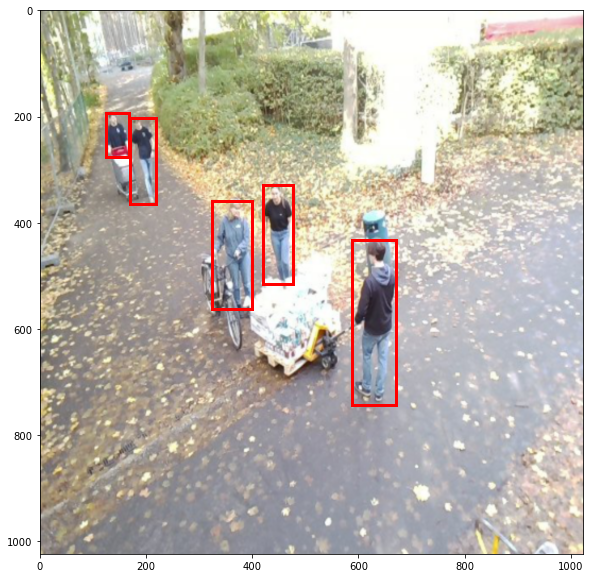

In [15]:
#show the images with the bounding boxes adn show only the persons
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test2)
for i in range(len(detector_output3['detection_boxes'][0])):
    if detector_output3['detection_scores'][0][i] > 0.5 and detector_output3['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output3['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 1024, xmax * 1024, ymin * 1024, ymax * 1024)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)


It detects all of the people but in more time than the first model so in the future we need to see if it can run the model on the image and write it to a database in less than 7 seconds

Now i'm going to test those models on a other image

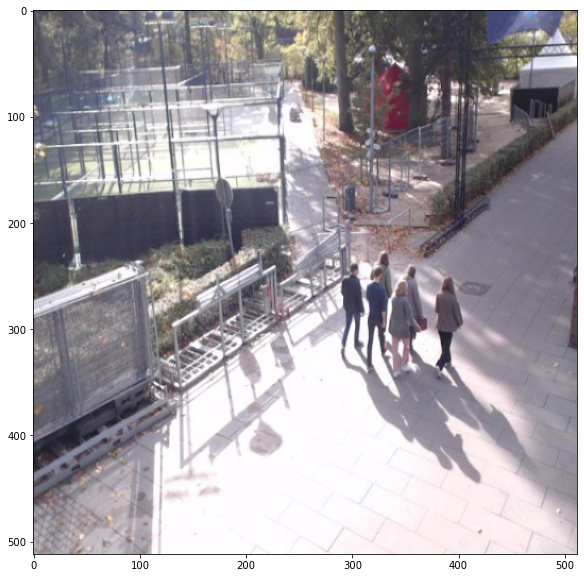

In [16]:
# load the image
test = plt.imread("1666696705748.jpg")
test = cv.resize(test, (512, 512))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)

In [17]:
# run the model
t0 = time.time()
detector_output4 = detector1(tf.expand_dims(test, axis=0))
t = time.time()
class_ids = detector_output4["detection_classes"]
detector_output4.keys()

dict_keys(['detection_boxes', 'detection_classes', 'detection_keypoint_scores', 'detection_keypoints', 'detection_scores', 'num_detections'])

In [18]:
t - t0

0.5007975101470947

The difference in time is 0.38 seconds.

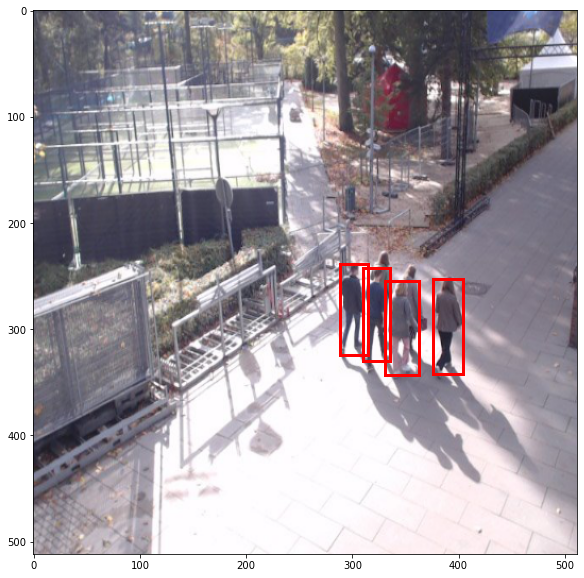

In [19]:
#show the images with the bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)
for i in range(len(detector_output4['detection_boxes'][0])):
    if detector_output4['detection_scores'][0][i] > 0.5 and detector_output4['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output4['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 512, xmax * 512, ymin * 512, ymax * 512)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)


It detects only 4 out of 6 people.
I'm going to test on a different detection score

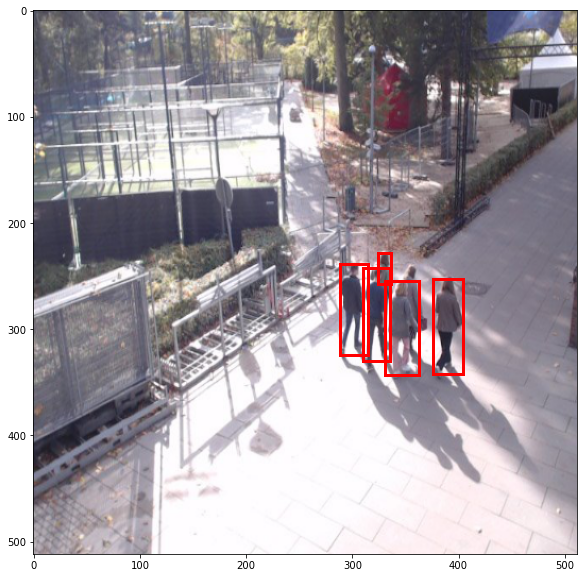

In [20]:
#show the images with the bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)
for i in range(len(detector_output4['detection_boxes'][0])):
    if detector_output4['detection_scores'][0][i] > 0.4 and detector_output4['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output4['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 512, xmax * 512, ymin * 512, ymax * 512)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)


If the detection score only needs to be more than 40% there are 5 out of 6 people detected.

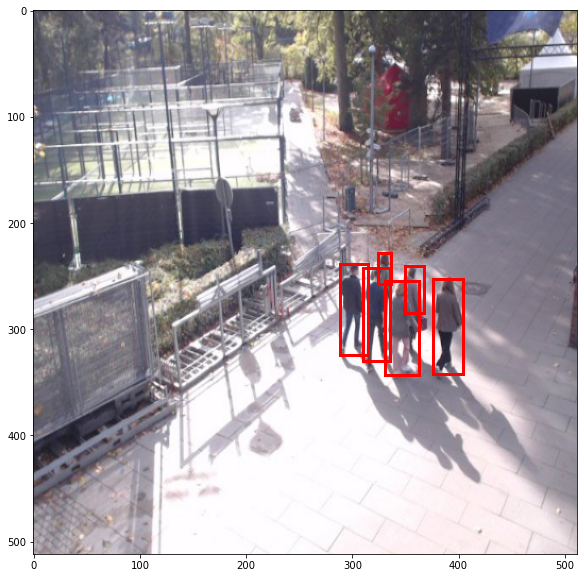

In [21]:
#show the images with the bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)
for i in range(len(detector_output4['detection_boxes'][0])):
    if detector_output4['detection_scores'][0][i] > 0.30 and detector_output4['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output4['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 512, xmax * 512, ymin * 512, ymax * 512)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)


With the detection score that is minimum 30% we see that all people are detected.

I'm going to test on the third model.

In [22]:
# resize the image to 1024x1024
test2 = cv.resize(test, (1024, 1024))

In [23]:
# run the model
t0 = time.time()
detector_output5 = detector3(tf.expand_dims(test, axis=0))
t = time.time()
class_ids = detector_output5["detection_classes"]
detector_output5.keys()

dict_keys(['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores'])

In [24]:
t - t0

2.654017448425293

Time difference is 2.23 seconds

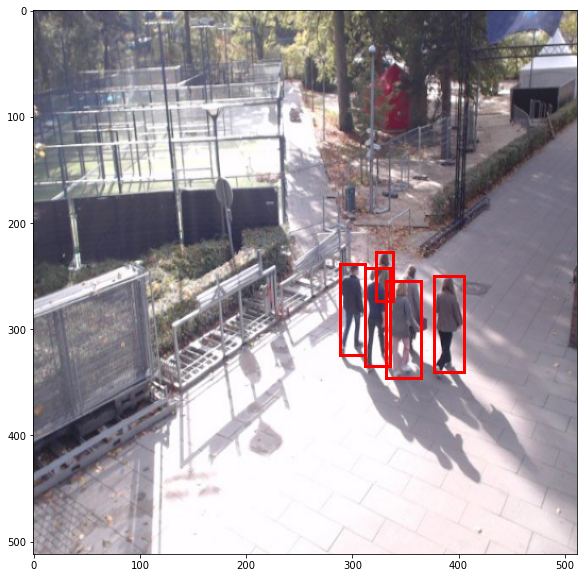

In [25]:
#show the images with the bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)
for i in range(len(detector_output5['detection_boxes'][0])):
    if detector_output5['detection_scores'][0][i] > 0.5 and detector_output5['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output5['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 512, xmax * 512, ymin * 512, ymax * 512)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)

This model detects 5 out of 6 people.

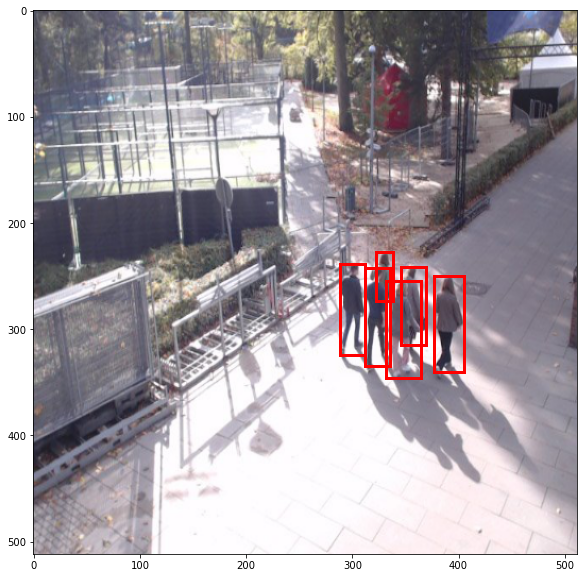

In [26]:
#show the images with the bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)
for i in range(len(detector_output5['detection_boxes'][0])):
    if detector_output5['detection_scores'][0][i] > 0.45 and detector_output5['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output5['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 512, xmax * 512, ymin * 512, ymax * 512)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)

When i'm going from 50 to 45 as detection score he detects all of the people on this image

I'm going to test a new model. The model is "centernet/resnet101v1_fpn_512x512"

In [27]:
# load the model
detector4 = hub.load("https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1")

In [28]:
# run the model
t0 = time.time()
detector_output6 = detector4(tf.expand_dims(test, axis=0))
t = time.time()
class_ids = detector_output6["detection_classes"]
detector_output6.keys()

dict_keys(['detection_boxes', 'detection_classes', 'detection_scores', 'num_detections'])

In [29]:
t - t0

2.031245470046997

Time difference is 0.62 seconds

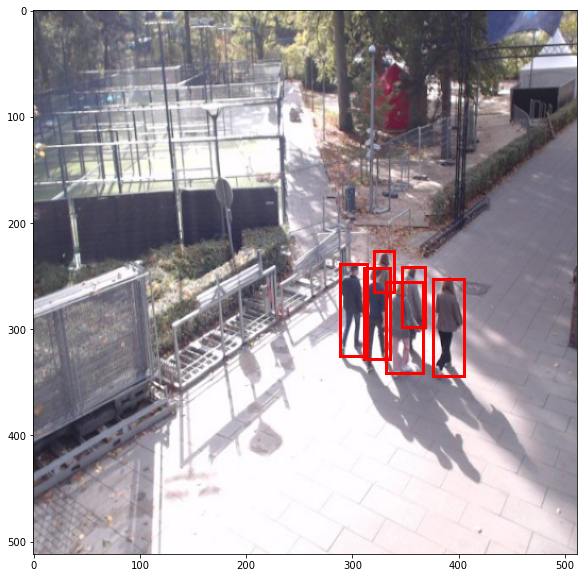

In [30]:
#show the images with the bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test)
for i in range(len(detector_output6['detection_boxes'][0])):
    if detector_output6['detection_scores'][0][i] > 0.40 and detector_output6['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output6['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 512, xmax * 512, ymin * 512, ymax * 512)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)

It is fast but i need to set the limit of the detections score from 50% to 40% so that it detects all the people

I'm also going to test this model on the first image. 

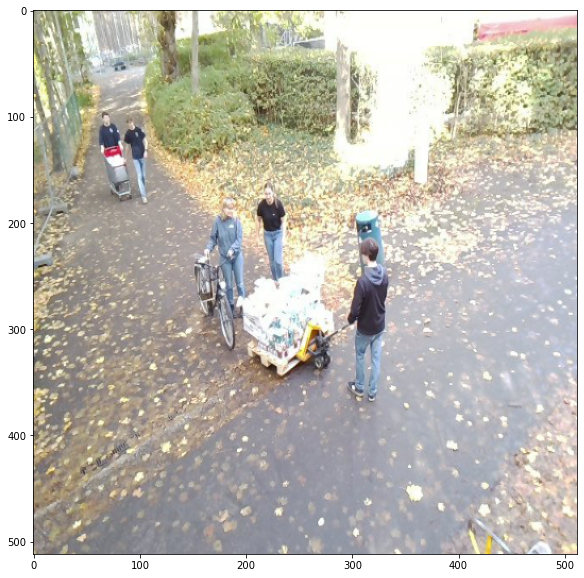

In [31]:
# load the image
first = plt.imread("1666696572939.jpg")
first = cv.resize(first, (512, 512))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(first)

In [32]:
# run the model
t0 = time.time()
detector_output7 = detector4(tf.expand_dims(first, axis=0))
t = time.time()
class_ids = detector_output7["detection_classes"]
detector_output7.keys()

dict_keys(['detection_boxes', 'detection_classes', 'detection_scores', 'num_detections'])

In [33]:
t - t0

0.6223902702331543

The difference in time is 0.61 seconds so it is fast.

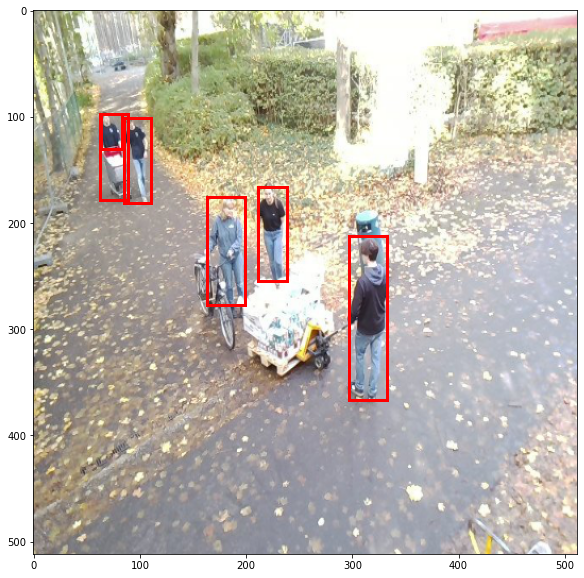

In [34]:
#show the images with the bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(first)
for i in range(len(detector_output7['detection_boxes'][0])):
    if detector_output7['detection_scores'][0][i] > 0.45 and detector_output7['detection_classes'][0][i] == 1:
        ymin, xmin, ymax, xmax = detector_output7['detection_boxes'][0][i]
        (left, right, top, bottom) = (xmin * 512, xmax * 512, ymin * 512, ymax * 512)
        rect = plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=3)
        ax.add_patch(rect)

So this is also a realy accurate model and realy fast but i think the second model is more accurate. But the second model is a little bit slower. So if it is possible within 7 seconds with the second model, i would choose the second model and otherwise i would choose one of the faster models.